#### YTUBE Video: https://youtu.be/Z1D0VhLHbu0

In [4]:
# Install required libraries
!pip install tensorflow numpy
# ... existing code ...

   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 1.2/1.2 MB 15.6 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 3.3
    Uninstalling setuptools-3.3:
      Successfully uninstalled setuptools-3.3


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
socketio 0.2.1 requires setuptools==3.3, but you have setuptools 75.8.0 which is incompatible.

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
! pip install matplotlib


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
# First, install TensorFlow properly
!pip install tensorflow==2.15.0


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



  Using cached tensorflow-2.15.0-cp310-cp310-win_amd64.whl.metadata (3.6 kB)
Using cached tensorflow-2.15.0-cp310-cp310-win_amd64.whl (2.1 kB)
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.18.0
    Uninstalling tensorflow-2.18.0:
      Successfully uninstalled tensorflow-2.18.0






Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 64)             

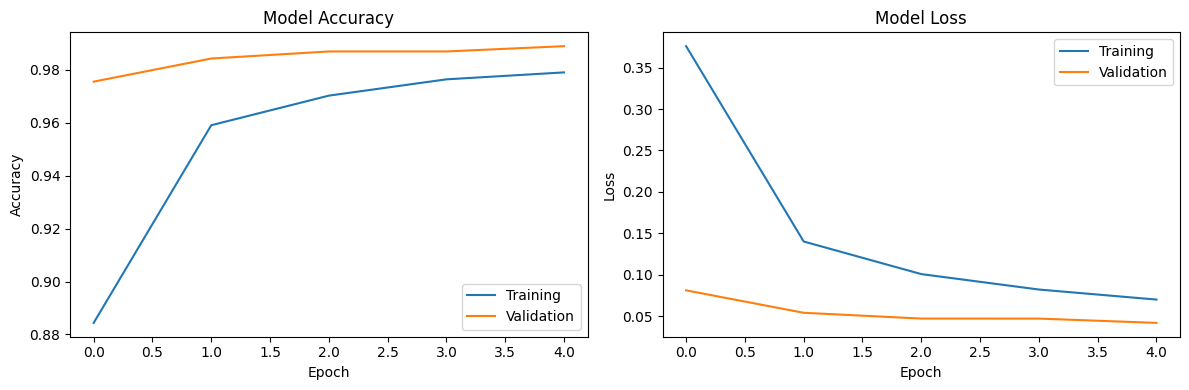

In [1]:


# Import required libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Load the MNIST dataset
data = mnist.load_data()
X_train, y_train = data[0]
X_test, y_test = data[1]

# Data preprocessing
# Normalize pixel values to range [0, 1] by dividing by 255
# Original values are 0-255 (8-bit grayscale)
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Reshape the data to add channel dimension (required for CNN)
# New shape: (samples, height, width, channels)
X_train = X_train.reshape((-1, 28, 28, 1))
X_test = X_test.reshape((-1, 28, 28, 1))

# Convert labels to one-hot encoded format
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Create the CNN model
model = models.Sequential([
    # Convolutional layer with 32 filters, 3x3 kernel
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    
    # Second convolutional layer with 64 filters
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Flatten the 2D feature maps for the dense layers
    layers.Flatten(),
    
    # Dense layers for classification
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),  # Add dropout to prevent overfitting
    layers.Dense(10, activation='softmax')  # 10 output classes (digits 0-9)
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Display model summary
model.summary()

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.2,
    verbose=1
)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'\nTest accuracy: {test_accuracy:.4f}')

# Plot training history
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [2]:
!pip install seaborn


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


313/313 [==============================] - 1s 3ms/step


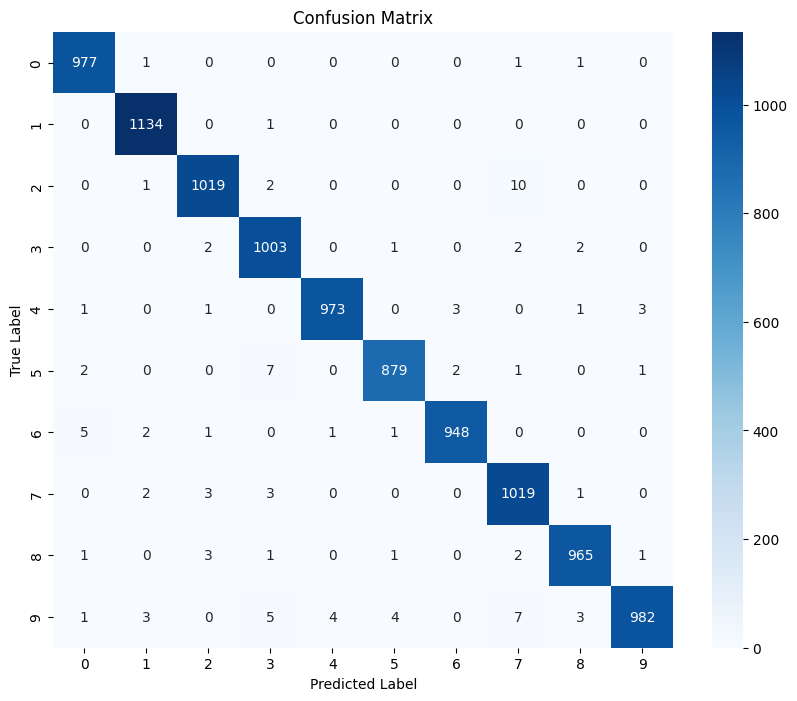


Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



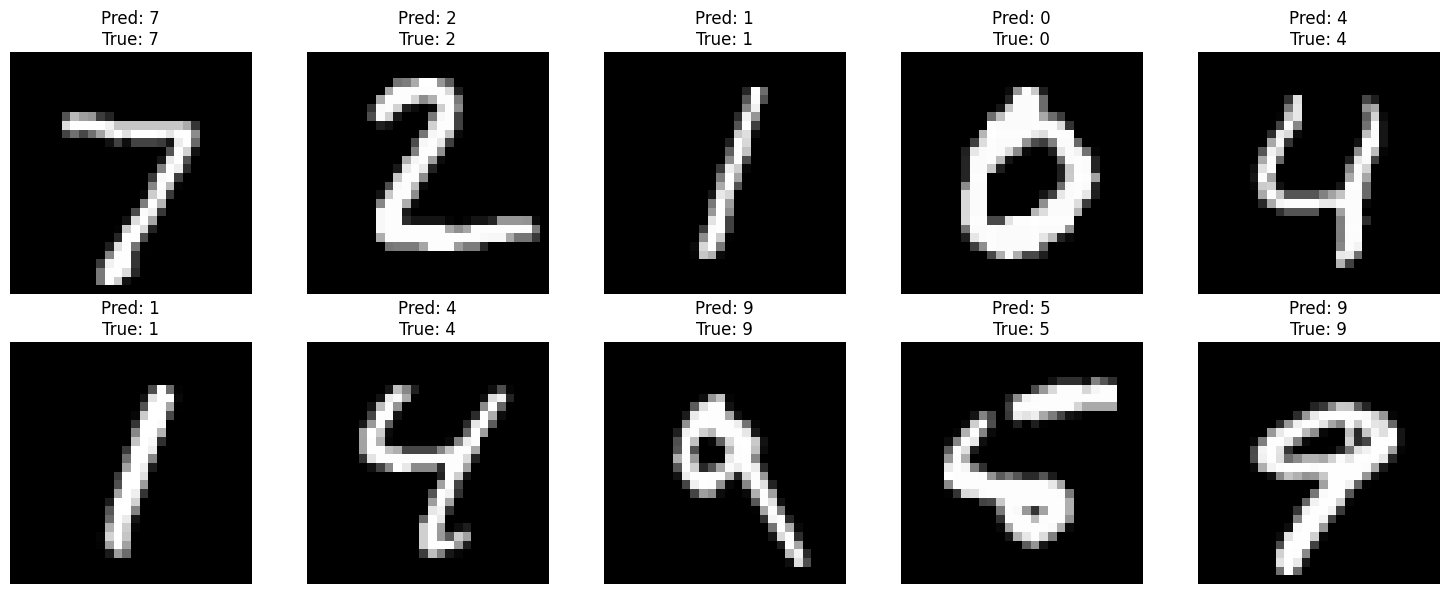

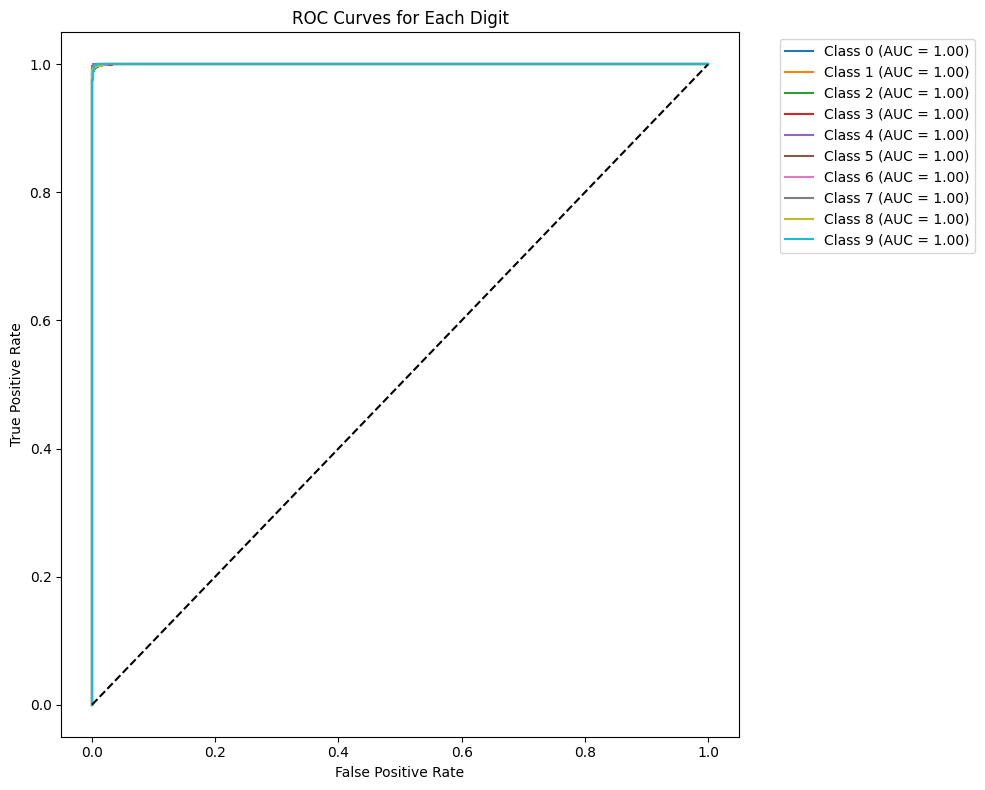

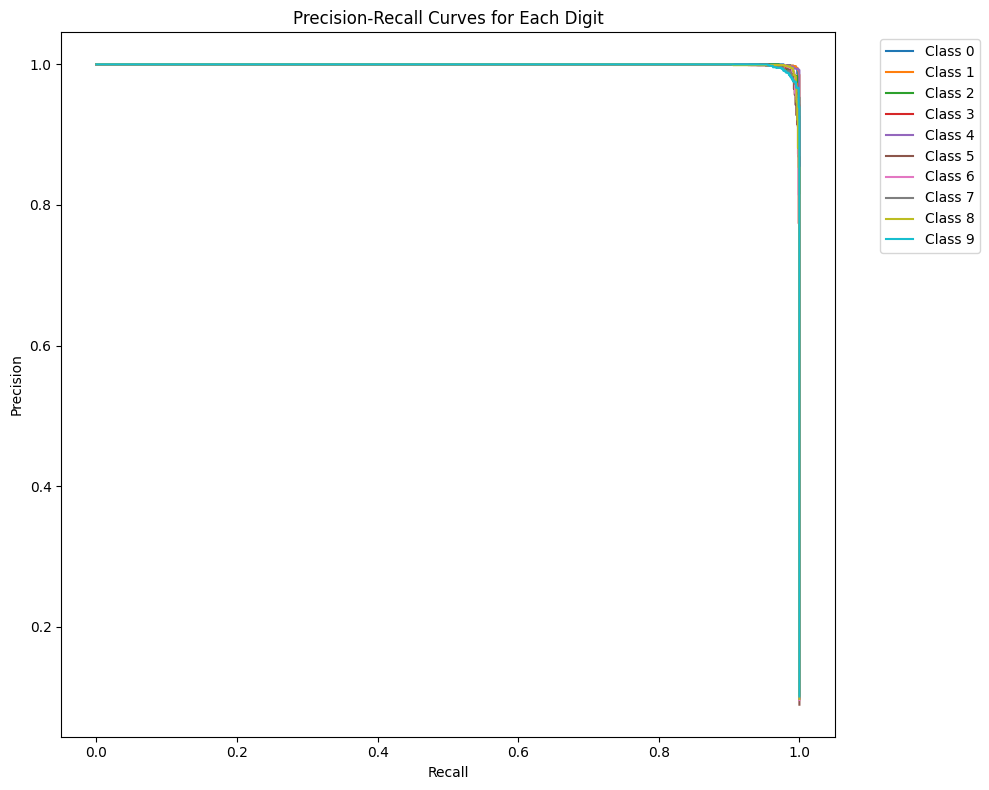

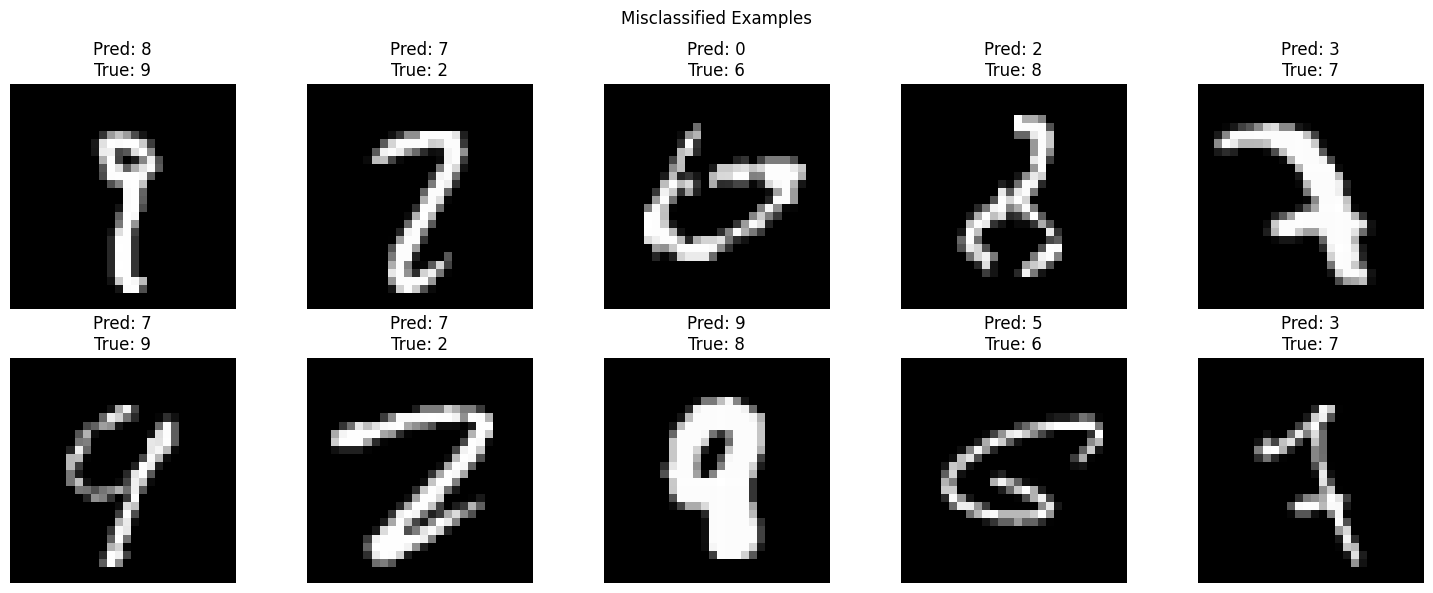

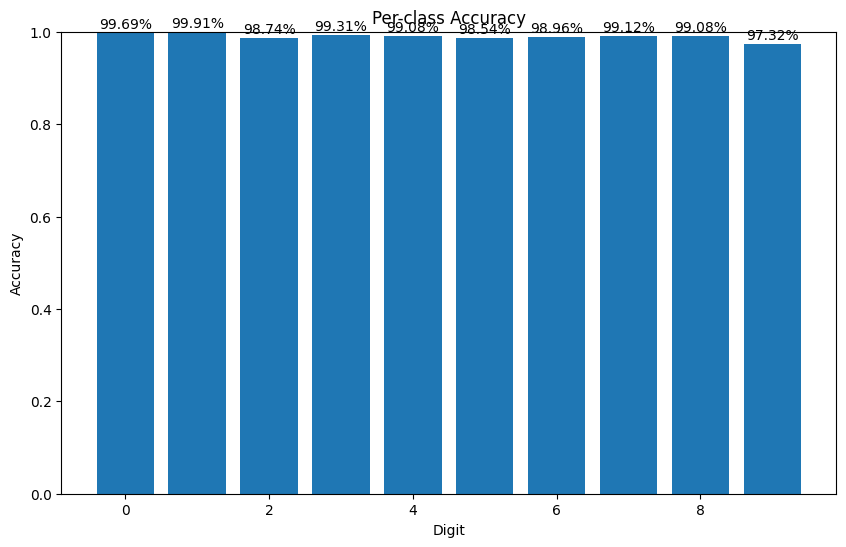

In [3]:
# ... existing code ...

# Import additional libraries
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_recall_curve, roc_curve, auc

# Get predictions
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# 1. Confusion Matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test_classes, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

# 2. Print Classification Report
print("\nClassification Report:")
print(classification_report(y_test_classes, y_pred))

# 3. Plot sample predictions
plt.figure(figsize=(15, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap="gray")
    pred_label = np.argmax(y_pred_probs[i])
    true_label = np.argmax(y_test[i])
    plt.title(f"Pred: {pred_label}\nTrue: {true_label}")
    plt.axis("off")
plt.tight_layout()
plt.show()

# 4. ROC Curves
plt.figure(figsize=(10, 8))
for i in range(10):
    fpr, tpr, _ = roc_curve(y_test[:, i], y_pred_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Each Digit")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

# 5. Precision-Recall Curves
plt.figure(figsize=(10, 8))
for i in range(10):
    precision, recall, _ = precision_recall_curve(y_test[:, i], y_pred_probs[:, i])
    plt.plot(recall, precision, label=f"Class {i}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curves for Each Digit")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

# 6. Error Analysis
# Find misclassified examples
misclassified_indices = np.where(y_pred != y_test_classes)[0]
plt.figure(figsize=(15, 6))
for i, idx in enumerate(misclassified_indices[:10]):  # Show first 10 mistakes
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap="gray")
    pred_label = y_pred[idx]
    true_label = y_test_classes[idx]
    plt.title(f"Pred: {pred_label}\nTrue: {true_label}")
    plt.axis("off")
plt.suptitle("Misclassified Examples")
plt.tight_layout()
plt.show()

# 7. Per-class Accuracy
class_accuracy = cm.diagonal() / cm.sum(axis=1)
plt.figure(figsize=(10, 6))
plt.bar(range(10), class_accuracy)
plt.title("Per-class Accuracy")
plt.xlabel("Digit")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
for i, v in enumerate(class_accuracy):
    plt.text(i, v + 0.01, f"{v:.2%}", ha="center")
plt.show()